# **Covid Impact on Sri Lanka.**

In [1]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
%cd /content/gdrive/MyDrive/SLIIT/Data_Science/Data Analyst Projects/Sample Projects

/content/gdrive/MyDrive/SLIIT/Data_Science/Data Analyst Projects/Sample Projects


In [3]:
import numpy as np
import pandas as pd

#import the csv while parsing the dates (if the data type of date is not in datetime, this will change it to that)
df = pd.read_csv('owid-covid-data.csv', parse_dates=True)

In [4]:
#Converting object type into datetime
df['date'] = pd.to_datetime(df['date'])
df['date'].info()

#add year & month columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

df.head()

<class 'pandas.core.series.Series'>
RangeIndex: 365398 entries, 0 to 365397
Series name: date
Non-Null Count   Dtype         
--------------   -----         
365398 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.8 MB


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,month
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1


In [5]:
df.dropna(subset='continent', inplace=True) #removing all the records were null values exist in 'continent' field
df['continent'].isnull().sum() #checing whether there are any null values left in continent field

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348008 entries, 0 to 365397
Data columns (total 69 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    348008 non-null  object        
 1   continent                                   348008 non-null  object        
 2   location                                    348008 non-null  object        
 3   date                                        348008 non-null  datetime64[ns]
 4   total_cases                                 310070 non-null  float64       
 5   new_cases                                   338309 non-null  float64       
 6   new_cases_smoothed                          337110 non-null  float64       
 7   total_deaths                                288516 non-null  float64       
 8   new_deaths                                  338356 non-null  float64      

## **I am not going to split the dataset into covid deaths & vaccinations deataframes as I have gained relatively a good understanding of the dataset now. I have added the year & month column which might be effective for the analysis.**

## **First let's check the how the pandemic affected the country. Will explore the number of deaths, cases, hospitalizations, and ICU admitions.**

In [30]:
Sri_Lanka_df = df.loc[df['location']=='Sri Lanka', ['date', 'year', 'month','location', 'population', 'new_cases', 'new_deaths', 'hosp_patients', 'icu_patients', 'new_tests', 'positive_rate', 'new_vaccinations', 'people_fully_vaccinated']].sort_values('date')
Sri_Lanka_df

,date,year,month,location,population,new_cases,new_deaths,hosp_patients,icu_patients,new_tests,positive_rate,new_vaccinations,people_fully_vaccinated
309301,2020-01-03,2020,1,Sri Lanka,21832150.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
309302,2020-01-04,2020,1,Sri Lanka,21832150.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
309303,2020-01-05,2020,1,Sri Lanka,21832150.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
309304,2020-01-06,2020,1,Sri Lanka,21832150.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
309305,2020-01-07,2020,1,Sri Lanka,21832150.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
310743,2023-12-15,2023,12,Sri Lanka,21832150.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
310744,2023-12-16,2023,12,Sri Lanka,21832150.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
310745,2023-12-17,2023,12,Sri Lanka,21832150.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
310746,2023-12-18,2023,12,Sri Lanka,21832150.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


## **It appears that no data in hosp_patients & icu_patients columns. Will Check that.**

In [35]:
Sri_Lanka_df['new_tests'].notnull().sum()

840

No values in those columns. So, no point of keeping them.

In [32]:
Sri_Lanka_df = Sri_Lanka_df.drop(['icu_patients', 'hosp_patients'], axis=1)

In [45]:
Sri_Lanka_df

,date,year,month,location,population,new_cases,new_deaths,new_tests,positive_rate,new_vaccinations,people_fully_vaccinated
309301,2020-01-03,2020,1,Sri Lanka,21832150.0,0.0,0.0,NaN,NaN,NaN,NaN
309302,2020-01-04,2020,1,Sri Lanka,21832150.0,0.0,0.0,NaN,NaN,NaN,NaN
309303,2020-01-05,2020,1,Sri Lanka,21832150.0,0.0,0.0,NaN,NaN,NaN,NaN
309304,2020-01-06,2020,1,Sri Lanka,21832150.0,0.0,0.0,NaN,NaN,NaN,NaN
309305,2020-01-07,2020,1,Sri Lanka,21832150.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
310743,2023-12-15,2023,12,Sri Lanka,21832150.0,2.0,0.0,NaN,NaN,NaN,NaN
310744,2023-12-16,2023,12,Sri Lanka,21832150.0,0.0,0.0,NaN,NaN,NaN,NaN
310745,2023-12-17,2023,12,Sri Lanka,21832150.0,0.0,0.0,NaN,NaN,NaN,NaN
310746,2023-12-18,2023,12,Sri Lanka,21832150.0,0.0,0.0,NaN,NaN,NaN,NaN


## **Let's explore how the cases, deaths, tests, vaccinations, and positive rate have been reported over time.**

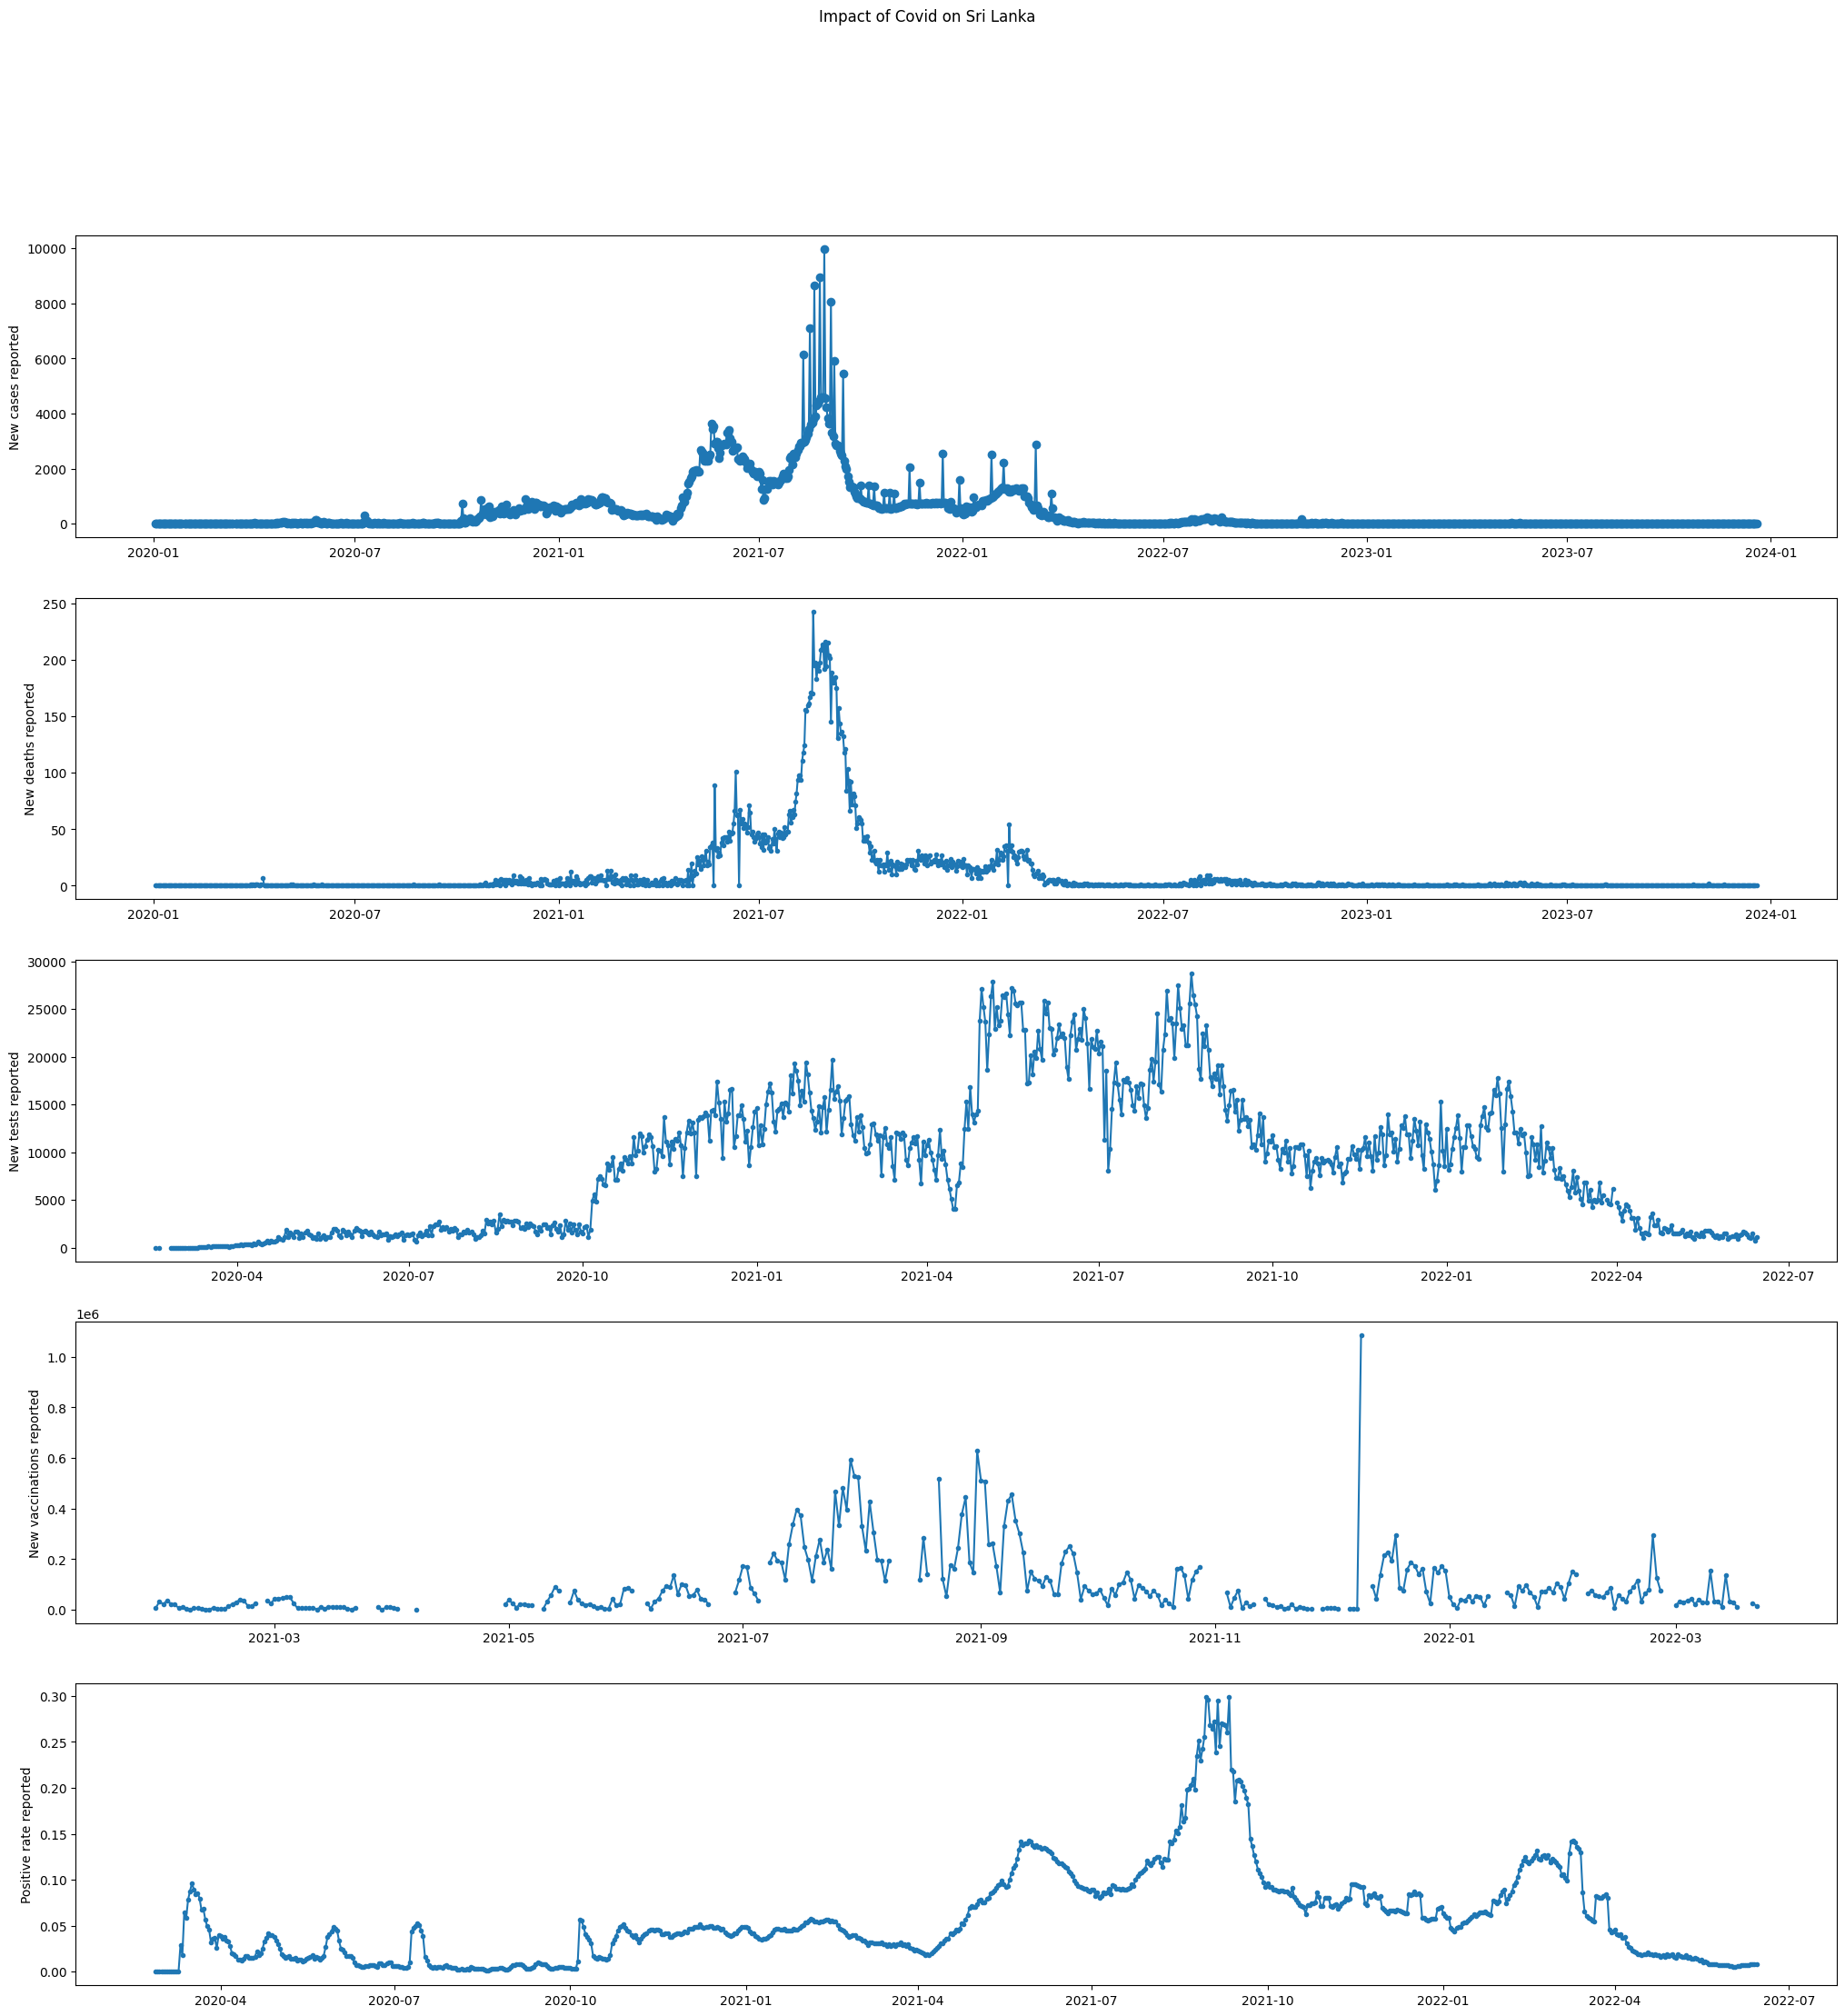

In [49]:
#import matplotlib
import matplotlib.pyplot as plt

#Let's try to plot both in the same figure
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(25, 25))
fig.suptitle('Impact of Covid on Sri Lanka')

ax1.plot(Sri_Lanka_df['date'], Sri_Lanka_df['new_cases'], 'o-')
ax1.set_ylabel('New cases reported')

ax2.plot(Sri_Lanka_df['date'], Sri_Lanka_df['new_deaths'], '.-')
ax2.set_ylabel('New deaths reported')

ax3.plot(Sri_Lanka_df['date'], Sri_Lanka_df['new_tests'], '.-')
ax3.set_ylabel('New tests reported')

ax4.plot(Sri_Lanka_df['date'], Sri_Lanka_df['new_vaccinations'], '.-')
ax4.set_ylabel('New vaccinations reported')

ax5.plot(Sri_Lanka_df['date'], Sri_Lanka_df['positive_rate'], '.-')
ax5.set_ylabel('Positive rate reported')

plt.show()

## **As it appears in the plots, from the fist quarter of 2021 to the second quarter of 2022 is the period where number of cases and deaths have peaked.**

## **Vaccination has peaked during the last 6,6 months of 2021. DUring that period the number of cases and deaths have surged as it appears in the plots. Same behaviour can be seen with the posotive rates and tests as well durng that exact period.**

## **Hence, the last 2 quarters of 2021 can be consodered as deadliest period of Covid for Sri Lanka.**

## **There is a clear correlation between number of new cases & new deaths as well. We can check the correlation of all the attributes.**

<ipython-input-46-c3433113662c>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Sri_Lanka_df.corr()


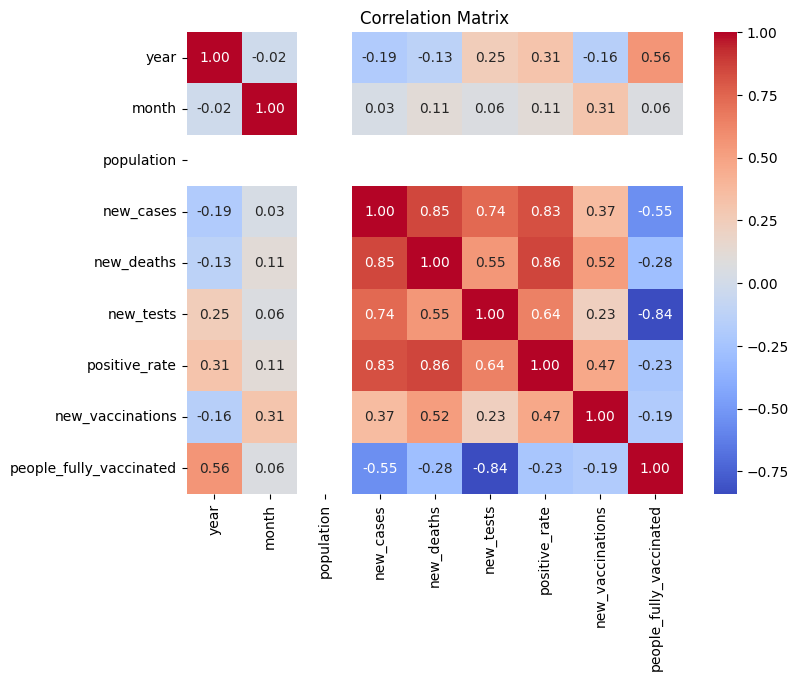

In [46]:
#Sri_Lanka_df.corr() we can use this to check the correlation.
#But lets create a heatmap to see it clearly.

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = Sri_Lanka_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## **As expected there is a high correlation between new cases & new deaths.**

## **As you can see there is a high correlation between new tests and new cases and between new cases ad positive rate as well.**

## **Let's get the cases & deaths percentage out of population.**

In [42]:
total_deaths = Sri_Lanka_df['new_deaths'].sum()

death_percentage = total_deaths/Sri_Lanka_df['population'].max()

total_cases = Sri_Lanka_df['new_cases'].sum()
cases_percentage = total_cases/Sri_Lanka_df['population'].max()

print("total cases : {:.2f}".format(total_cases))
print("total cases as a percentage : {:.2%}".format(cases_percentage))
print("total deaths : {:.2f}".format(total_deaths))
print("total deaths as a percentage : {:.2%}".format(death_percentage))

total cases : 672669.00
total cases as a percentage : 3.08%
total deaths : 16892.00
total deaths as a percentage : 0.08%


## **Let's explore how the progress of the vaccination program in Sri Lanka.**

## **As it appears in the previous time series plot, the vaccinations peaked at the last 6 months of 2021.**

## **Let's look at the vaccinated population in Sri Lanka.**

In [51]:
total_fully_vaccinated = Sri_Lanka_df['people_fully_vaccinated'].max()
fully_vaccinated_population = total_fully_vaccinated/Sri_Lanka_df['population'].max()

print("total number of fully vaccinated people : {:.2f}".format(total_fully_vaccinated))
print("fully vaccinated percentage : {:.2%}".format(fully_vaccinated_population))

total number of fully vaccinated people : 14752827.00
fully vaccinated percentage : 67.57%


## **That's quite a good percentage of fully vaccinated people compared to most of the other countries.**

If you can remember NZ & USA followed entirely different policies when it comes to curbing the covid pandemic. Let's compare the impact of covid in Sri Lanka with those two countries. Let's include both UK and India to the mix as well.

In [55]:
new_df = df[(df['location'] == 'Sri Lanka') | (df['location'] == 'India') | (df['location'] == 'United States') | (df['location'] == 'New Zealand') | (df['location'] == 'United Kingdom')][['date','location', 'population', 'new_cases', 'new_deaths', 'new_tests', 'positive_rate', 'new_vaccinations', 'people_fully_vaccinated']]
new_df

,date,location,population,new_cases,new_deaths,new_tests,positive_rate,new_vaccinations,people_fully_vaccinated
145950,2020-01-03,India,1.417173e+09,0.0,0.0,NaN,NaN,NaN,NaN
145951,2020-01-04,India,1.417173e+09,0.0,0.0,NaN,NaN,NaN,NaN
145952,2020-01-05,India,1.417173e+09,0.0,0.0,NaN,NaN,NaN,NaN
145953,2020-01-06,India,1.417173e+09,0.0,0.0,NaN,NaN,NaN,NaN
145954,2020-01-07,India,1.417173e+09,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
345375,2023-12-15,United States,3.382899e+08,NaN,NaN,NaN,NaN,NaN,NaN
345376,2023-12-16,United States,3.382899e+08,NaN,NaN,NaN,NaN,NaN,NaN
345377,2023-12-17,United States,3.382899e+08,NaN,NaN,NaN,NaN,NaN,NaN
345378,2023-12-18,United States,3.382899e+08,NaN,NaN,NaN,NaN,NaN,NaN


# **We can compre them better if we take everything as a percentage of the population of the respective country.**

In [59]:
new_df['new_cases'] = new_df['new_cases']/new_df['population']
new_df['new_deaths'] = new_df['new_deaths']/new_df['population']
new_df['new_tests'] = new_df['new_tests']/new_df['population']
new_df['new_vaccinations'] = new_df['new_vaccinations']/new_df['population']

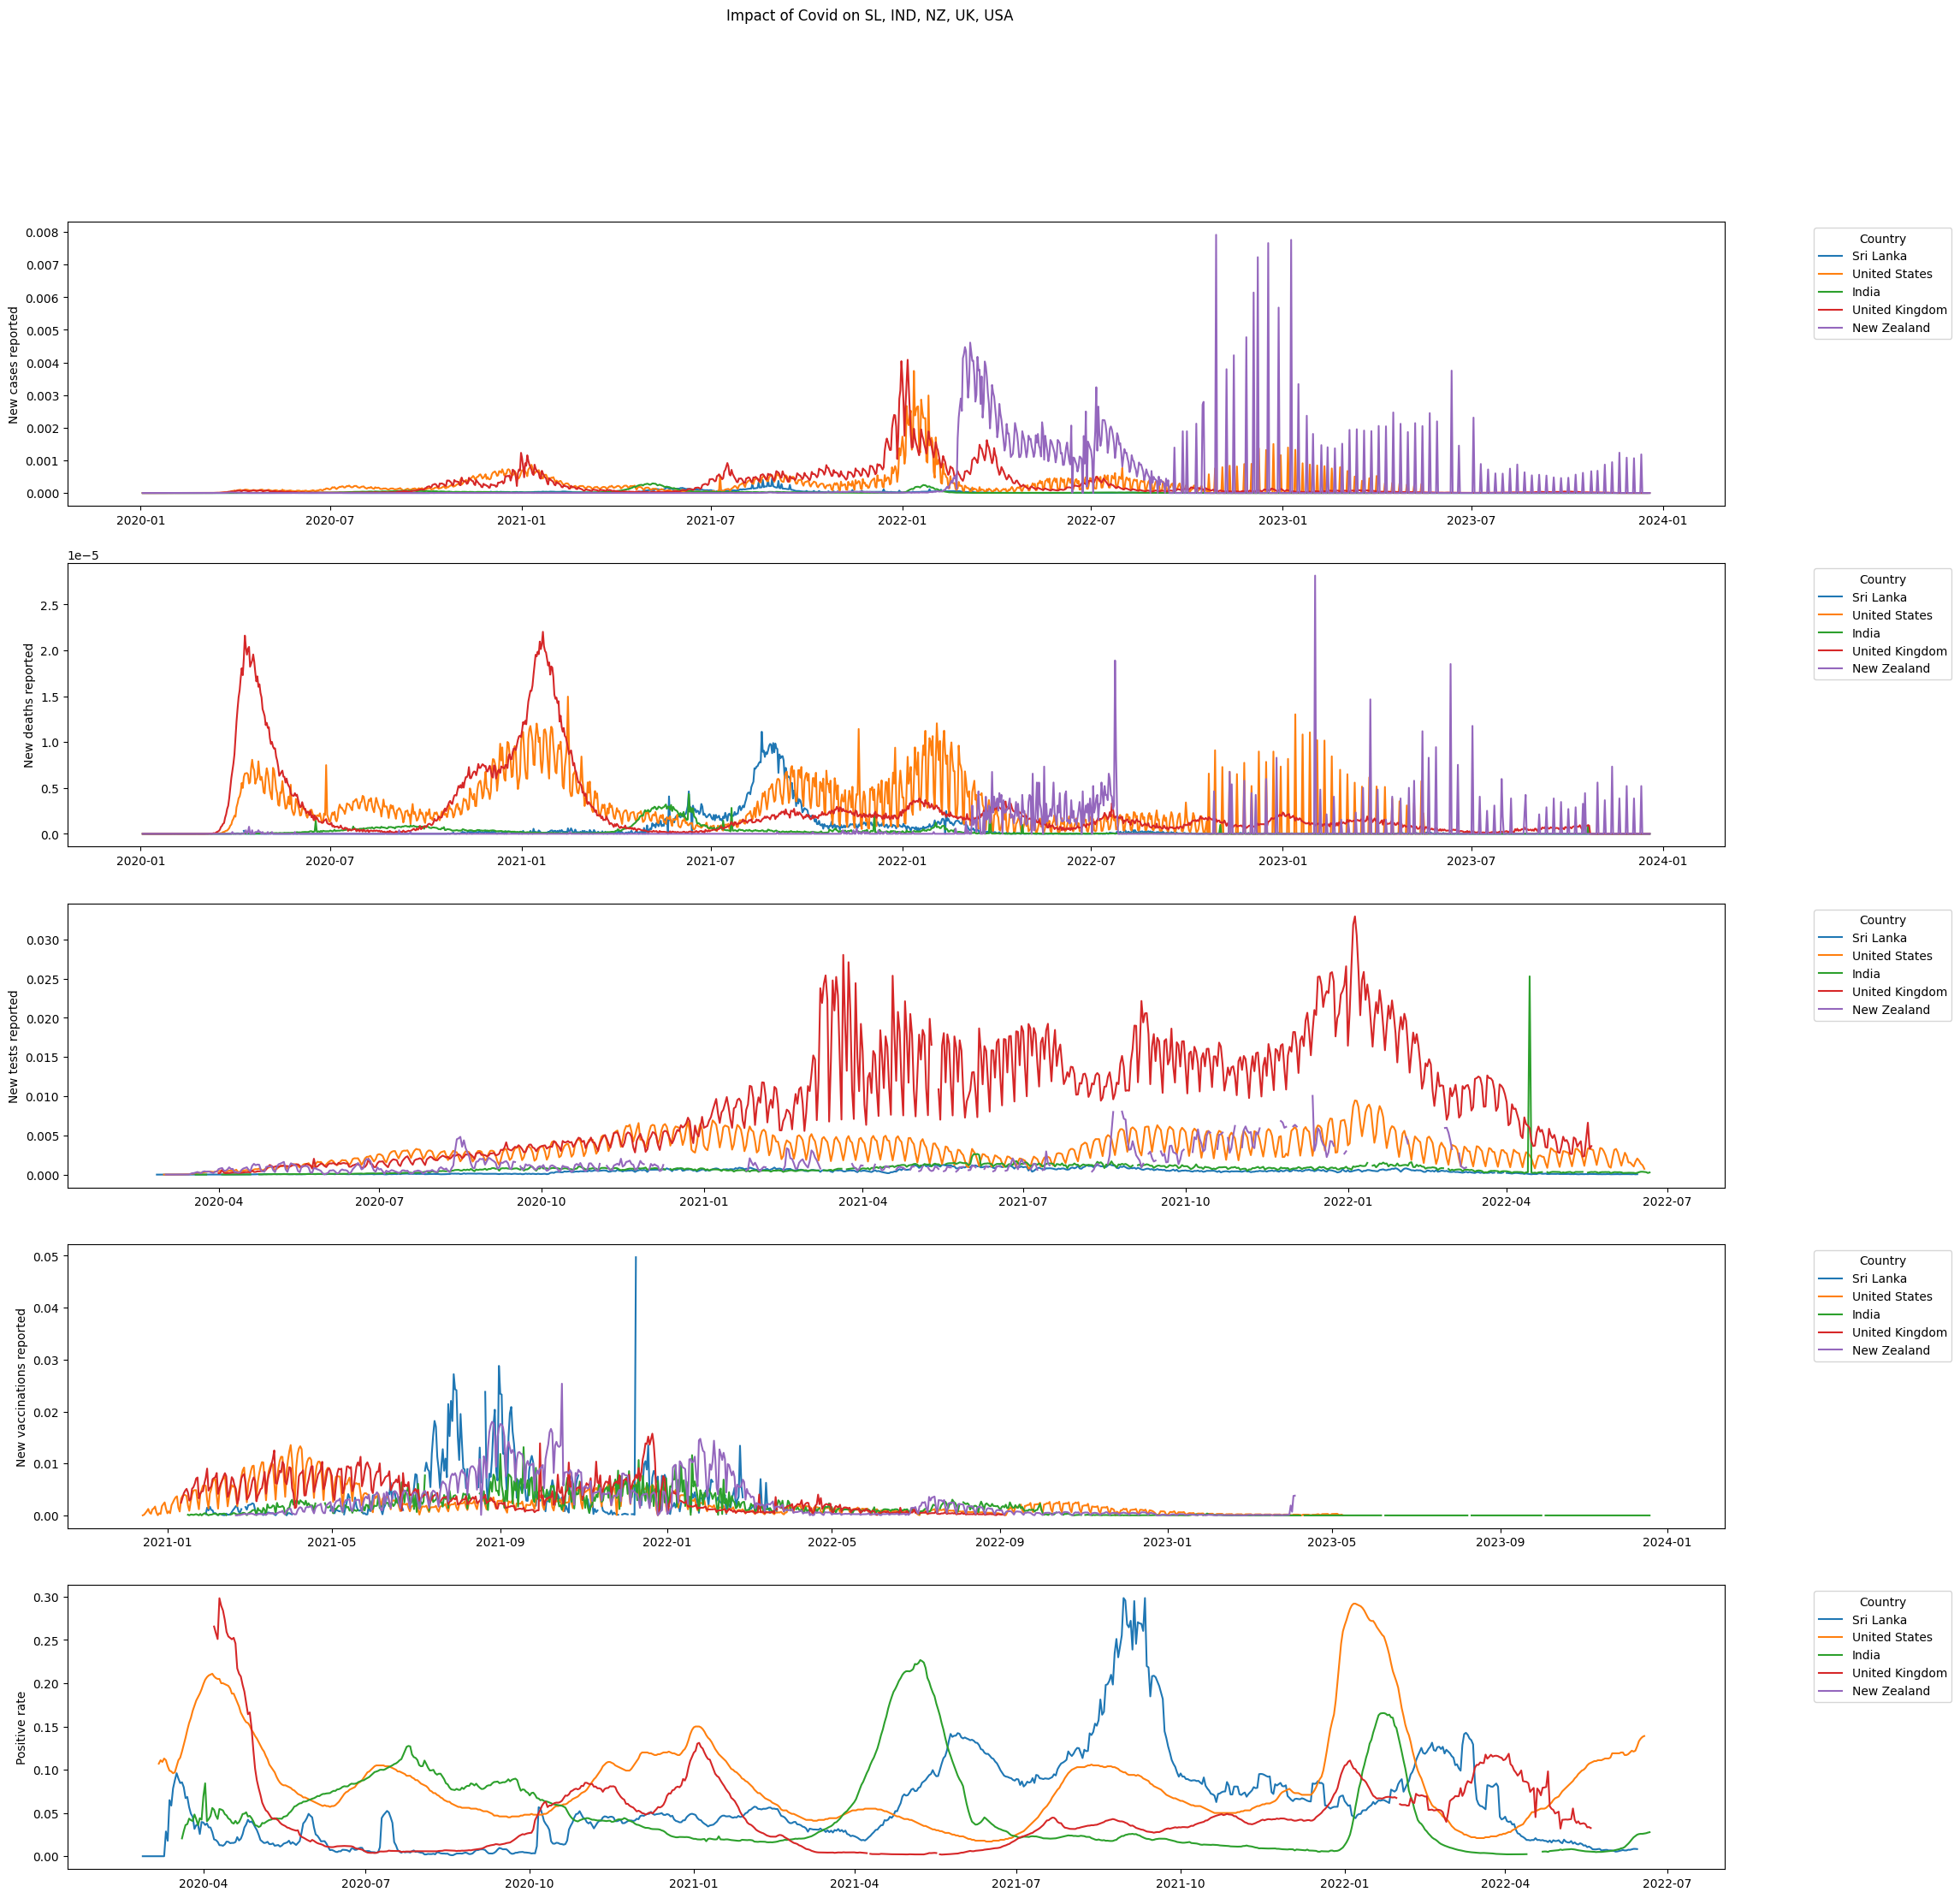

In [67]:
# Plot everything for each country
selected_countries = ['Sri Lanka', 'United States', 'India', 'United Kingdom', 'New Zealand']

#Let's try to plot everything in the same figure
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(25, 25))
fig.suptitle('Impact of Covid on SL, IND, NZ, UK, USA')

#plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = new_df[new_df['location'] == country]
    ax1.plot(country_data['date'], country_data['new_cases'], label=country)
    ax1.set_ylabel('New cases reported')
    ax1.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

for country in selected_countries:
    country_data = new_df[new_df['location'] == country]
    ax2.plot(country_data['date'], country_data['new_deaths'], label=country)
    ax2.set_ylabel('New deaths reported')
    ax2.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

for country in selected_countries:
    country_data = new_df[new_df['location'] == country]
    ax3.plot(country_data['date'], country_data['new_tests'], label=country)
    ax3.set_ylabel('New tests reported')
    ax3.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

for country in selected_countries:
    country_data = new_df[new_df['location'] == country]
    ax4.plot(country_data['date'], country_data['new_vaccinations'], label=country)
    ax4.set_ylabel('New vaccinations reported')
    ax4.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

for country in selected_countries:
    country_data = new_df[new_df['location'] == country]
    ax5.plot(country_data['date'], country_data['positive_rate'], label=country)
    ax5.set_ylabel('Positive rate')
    ax5.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels and legend
#plt.title('New Cases Over Time for Selected Countries')
#plt.xlabel('Date')
#plt.ylabel('New Cases')
#plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.xticks(rotation=45)

# Show the plot
plt.show()

## **Difference between policies followed by USA and NZ is clearly visible here. NZ went for a Islandwide lockdown during most part of 2020 & 2021. They had to face severe financial cnsequences later due to this policy. They counldnt do that for so long as you can see the number of cases and deaths surged since the start of 2022.**

## **USA and UK have faced a surge in deaths in the midle part of 2020 & the early part of 2021 whereas IND & SL faced more fatalities in the later part of 2021.NZ on the other hand saw more damage after 2022 as a result of their lockdowns. Interesting to see USA has experienced more fatalities even after 2022 whereas UK, IND, SL see a gradual decline of fatalities after late 2021.**

## **Looing at the plot it can be argued that SL and IND have managed to curbe the pandemic with the least amount of damage compared to other 3 countries.**

## **If we look at the vaccination rollout in these countries, it is clearly visible that UK & USA picked up the pace early on as they managed to produce vaccines. Meanwhile it's impressive to see the way SL picked up the pace from the 2nd quarter of 2021. This was thanks to the Chinese vaccines.**

In [68]:
new_df.to_csv('covid_impact_of_SL_IND_UK_USA_NZ.csv')

In [69]:
Sri_Lanka_df.to_csv('covid_impact_on_SL.csv')